# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [41]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from pathlib import Path
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dredm\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [42]:
# Read your api key environment variable
load_dotenv('C:/Users/dredm/Desktop/Daryl/Fintech_Bootcamp/Git_Repos/uw-fintech-spring-21/.env')
news_api_key = os.getenv("NEWS_API_KEY")

type(news_api_key)

str

In [21]:
#os.getcwd()

In [43]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=news_api_key)

In [44]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    sort_by="relevancy"
)
bitcoin_news["totalResults"]


10340

In [45]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    sort_by ="relevancy"
)
ethereum_news["totalResults"]

4164

In [46]:
#Create DataFrame function
def create_df(news, language):
    articles=[]
    for article in news:
        try:
            title = article["title"],
            description = article["description"],
            text = article["content"],
            date = article["publishedAt"][:10]
            
            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass
    return pd.DataFrame(articles)



In [47]:
# Create the Bitcoin Dataframe and save it as csv with encoding utf-8-sig
bitcoin_df = create_df(bitcoin_news["articles"], "en")
file_path = Path("bitcoin_df_encoded.csv")
bitcoin_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [48]:
#Load the encoded Bitcoin CSV file
file_path = Path("bitcoin_df_encoded.csv")
bitcoin_enc_df = pd.read_csv(file_path, encoding="utf-8-sig")
bitcoin_enc_df.head()

,title,description,text,date,language
0,('What Square’s smashing earnings tell us abou...,"(""Today we're talking Square earnings and its ...",('Shares of Square are up more than 6% today a...,2021-05-07,en
1,('Tesla sees bitcoin as important financial to...,('Tesla’s relationship with bitcoin is not a d...,('Tesla’s relationship with bitcoin is not a d...,2021-04-27,en
2,"(""You Can Now Exchange Crypto on Venmo, If You...",('Cryptocurrency continues to gain mainstream ...,('Cryptocurrency continues to gain mainstream ...,2021-04-20,en
3,('African crypto usage spurs Luno as customers...,('The crypto industry as a whole has seen a mo...,('The crypto industry as a whole has seen a mo...,2021-04-13,en
4,('Crypto market takes a dive with Bitcoin lead...,('Cryptocurrency prices continued to tumble Fr...,('Cryptocurrency prices continued to tumble Fr...,2021-04-23,en


In [58]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
        
}

for index, row in bitcoin_enc_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row["text"])
        bitcoin_text_sent["text_compound"].append(text_sentiment["compound"])
        bitcoin_text_sent["text_pos"].append(text_sentiment["pos"])
        bitcoin_text_sent["text_neu"].append(text_sentiment["neu"])
        bitcoin_text_sent["text_neg"].append(text_sentiment["neg"])
        
    except AttributeError:
        pass

bitcoin_sentiment_df = pd.DataFrame(bitcoin_text_sent)
bitcoin_sentiment_df = bitcoin_sentiment_df.join(bitcoin_enc_df['text'])
bitcoin_sentiment_df.head()

,text_compound,text_pos,text_neu,text_neg,text
0,0.0000,0.000,1.000,0.0,('Shares of Square are up more than 6% today a...
1,0.0000,0.000,1.000,0.0,('Tesla’s relationship with bitcoin is not a d...
2,0.7506,0.171,0.829,0.0,('Cryptocurrency continues to gain mainstream ...
3,0.6124,0.135,0.865,0.0,('The crypto industry as a whole has seen a mo...
4,0.0000,0.000,1.000,0.0,('Cryptocurrency prices continued to tumble Fr...


In [59]:
# Create the Ethereum Dataframe and save it as csv with encoding utf-8-sig
ethereum_df = create_df(ethereum_news["articles"], "en")
#bitcoin_df.head()
file_path = Path("ethereum_df_encoded.csv")
ethereum_df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [60]:
#Load the encoded Bitcoin CSV file
file_path = Path("ethereum_df_encoded.csv")
ethereum_enc_df = pd.read_csv(file_path, encoding="utf-8-sig")
ethereum_enc_df.head()

,title,description,text,date,language
0,('Radical Ethereum entrepreneurs are redefinin...,('Their investors call them disruptive innovat...,('Their investors call them disruptive innovat...,2021-05-04,en
1,"(""You Can Now Exchange Crypto on Venmo, If You...",('Cryptocurrency continues to gain mainstream ...,('Cryptocurrency continues to gain mainstream ...,2021-04-20,en
2,('Venmo now lets users buy and sell Bitcoin an...,('Venmo is jumping aboard the cryptocurrency b...,('Venmo is jumping aboard the cryptocurrency b...,2021-04-20,en
3,"('Move over, Bitcoin. Ethereum is at an all-ti...","(""Bitcoin prices continued their rebound Satur...","(""New York (CNN Business)Bitcoin prices contin...",2021-05-01,en
4,('CryptoPunks maker Larva Labs launches their ...,"('The creators behind CryptoPunks, one of the ...","('The creators behind CryptoPunks, one of the ...",2021-05-03,en


In [62]:
# Create the Ethereum sentiment scores DataFrame

ethereum_text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
        
}

for index, row in ethereum_enc_df.iterrows():
    try:
        text_sentiment = analyzer.polarity_scores(row["text"])
        ethereum_text_sent["text_compound"].append(text_sentiment["compound"])
        ethereum_text_sent["text_pos"].append(text_sentiment["pos"])
        ethereum_text_sent["text_neu"].append(text_sentiment["neu"])
        ethereum_text_sent["text_neg"].append(text_sentiment["neg"])
        
    except AttributeError:
        pass

ethereum_sentiment_df = pd.DataFrame(ethereum_text_sent)
ethereum_sentiment_df = ethereum_sentiment_df.join(ethereum_enc_df['text'])
ethereum_sentiment_df.head()

,text_compound,text_pos,text_neu,text_neg,text
0,-0.4019,0.072,0.778,0.15,('Their investors call them disruptive innovat...
1,0.7506,0.171,0.829,0.00,('Cryptocurrency continues to gain mainstream ...
2,0.0258,0.037,0.963,0.00,('Venmo is jumping aboard the cryptocurrency b...
3,0.0000,0.000,1.000,0.00,"(""New York (CNN Business)Bitcoin prices contin..."
4,0.4754,0.091,0.909,0.00,"('The creators behind CryptoPunks, one of the ..."


In [63]:
# Describe the Bitcoin Sentiment
bitcoin_sentiment_df.describe()

,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.000000,20.000000
mean,0.241810,0.070000,0.919500,0.010550
std,0.348065,0.081933,0.087422,0.026112
min,-0.381800,0.000000,0.767000,0.000000
25%,0.000000,0.000000,0.828250,0.000000
50%,0.012900,0.018500,0.939000,0.000000
75%,0.483400,0.140750,1.000000,0.000000
max,0.845500,0.233000,1.000000,0.085000


In [64]:
# Describe the Ethereum Sentiment
ethereum_sentiment_df.describe()

,text_compound,text_pos,text_neu,text_neg
count,20.000000,20.000000,20.000000,20.000000
mean,0.111150,0.042800,0.945900,0.011300
std,0.299861,0.059696,0.070965,0.036794
min,-0.401900,0.000000,0.778000,0.000000
25%,0.000000,0.000000,0.923250,0.000000
50%,0.000000,0.018500,0.962500,0.000000
75%,0.164300,0.065250,1.000000,0.000000
max,0.817600,0.210000,1.000000,0.150000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the higher mean positive score when evaluating the text.

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [65]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [97]:
# Instantiate the lemmatizer
lmt = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')

# Expand the default stopwords list if necessary
sw_addons = ["said", "it", "''", '``', "'The", "'By", 'char' ]
sw = sw + sw_addons

In [98]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    
    # Convert the words to lowercase
    words = list(filter(lambda word: word.lower(), words))
    
    # Remove the punctuation from text
    words = list(filter(lambda w: w not in punctuation, words))
    
    # Remove the stop words
    words = list(filter(lambda w: w.lower() not in sw, words))
    
    # Lemmatize words into root words
    tokens = [lmt.lemmatize(word) for word in words]
        
    return tokens


In [99]:
# Create a new tokens column for Bitcoin
bitcoin_sentiment_df['tokens'] = bitcoin_sentiment_df.text.apply(tokenizer)
bitcoin_sentiment_df.head()


,text_compound,text_pos,text_neu,text_neg,text,tokens
0,0.0000,0.000,1.000,0.0,('Shares of Square are up more than 6% today a...,"['Shares, Square, 6, today, American, fintech,..."
1,0.0000,0.000,1.000,0.0,('Tesla’s relationship with bitcoin is not a d...,"['Tesla, ’, relationship, bitcoin, dalliance, ..."
2,0.7506,0.171,0.829,0.0,('Cryptocurrency continues to gain mainstream ...,"['Cryptocurrency, continues, gain, mainstream,..."
3,0.6124,0.135,0.865,0.0,('The crypto industry as a whole has seen a mo...,"['The, crypto, industry, whole, seen, momentou..."
4,0.0000,0.000,1.000,0.0,('Cryptocurrency prices continued to tumble Fr...,"['Cryptocurrency, price, continued, tumble, Fr..."


In [100]:
# Create a new tokens column for Ethereum
ethereum_sentiment_df['tokens'] = ethereum_sentiment_df.text.apply(tokenizer)
ethereum_sentiment_df.head()

,text_compound,text_pos,text_neu,text_neg,text,tokens
0,-0.4019,0.072,0.778,0.15,('Their investors call them disruptive innovat...,"['Their, investor, call, disruptive, innovator..."
1,0.7506,0.171,0.829,0.00,('Cryptocurrency continues to gain mainstream ...,"['Cryptocurrency, continues, gain, mainstream,..."
2,0.0258,0.037,0.963,0.00,('Venmo is jumping aboard the cryptocurrency b...,"['Venmo, jumping, aboard, cryptocurrency, band..."
3,0.0000,0.000,1.000,0.00,"(""New York (CNN Business)Bitcoin prices contin...","[New, York, CNN, Business, Bitcoin, price, con..."
4,0.4754,0.091,0.909,0.00,"('The creators behind CryptoPunks, one of the ...","['The, creator, behind, CryptoPunks, one, popu..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [101]:
from collections import Counter
from nltk import ngrams

In [104]:
# Generate the Bitcoin N-grams where N=2
N = 2
bit_grams = ngrams(tokenizer(bitcoin_sentiment_df.text.str.cat()), N)
Counter(bit_grams).most_common(15)

[(('char', "'By"), 4),
 (("'By", 'Reuters'), 4),
 (('char', "'Cryptocurrency"), 2),
 (('char', "'The"), 2),
 (('institutional', 'investor'), 2),
 (('price', 'continued'), 2),
 (('Inc', 'major'), 2),
 (('major', 'bitcoin'), 2),
 (('bitcoin', 'corporate'), 2),
 (('corporate', 'backer'), 2),
 (('backer', 'Monday'), 2),
 (('Monday', 'non-employee'), 2),
 (('non-employee', 'director'), 2),
 (('director', 'get'), 2),
 (('get', 'fee'), 2)]

In [105]:
# Generate the Ethereum N-grams where N=2
N = 2
eth_grams = ngrams(tokenizer(ethereum_sentiment_df.text.str.cat()), N)
Counter(eth_grams).most_common(15)

[(('char', "'By"), 4),
 (("'By", 'Reuters'), 4),
 (('representation', 'virtual'), 4),
 (('virtual', 'currency'), 4),
 (('currency', 'Ethereum'), 4),
 (('Ethereum', 'seen'), 4),
 (('seen', 'front'), 4),
 (('front', 'stock'), 4),
 (('stock', 'graph'), 4),
 (('graph', 'illustration'), 4),
 (('illustration', 'taken'), 4),
 (('taken', 'February'), 4),
 (('February', '19'), 4),
 (('19', '2021'), 4),
 (('2021', 'REUTERS/Dado'), 4)]

In [106]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [107]:
# Use token_count to get the top 10 words for Bitcoin
bit_tokens = tokenizer(bitcoin_sentiment_df.text.str.cat())
token_count(bit_tokens, 10)

[('char', 20),
 ('Reuters', 8),
 ('bitcoin', 7),
 ('Bitcoin', 6),
 ('cryptocurrency', 5),
 ('Monday', 4),
 ('service', 4),
 ("'By", 4),
 ('company', 3),
 ('coin', 3)]

In [108]:
# Use token_count to get the top 10 words for Ethereum
eth_tokens = tokenizer(ethereum_sentiment_df.text.str.cat())
token_count(eth_tokens, 10)

[('char', 20),
 ('Ethereum', 7),
 ('Reuters', 7),
 ('currency', 7),
 ('stock', 5),
 ('project', 4),
 ('major', 4),
 ("'By", 4),
 ('representation', 4),
 ('virtual', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [109]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

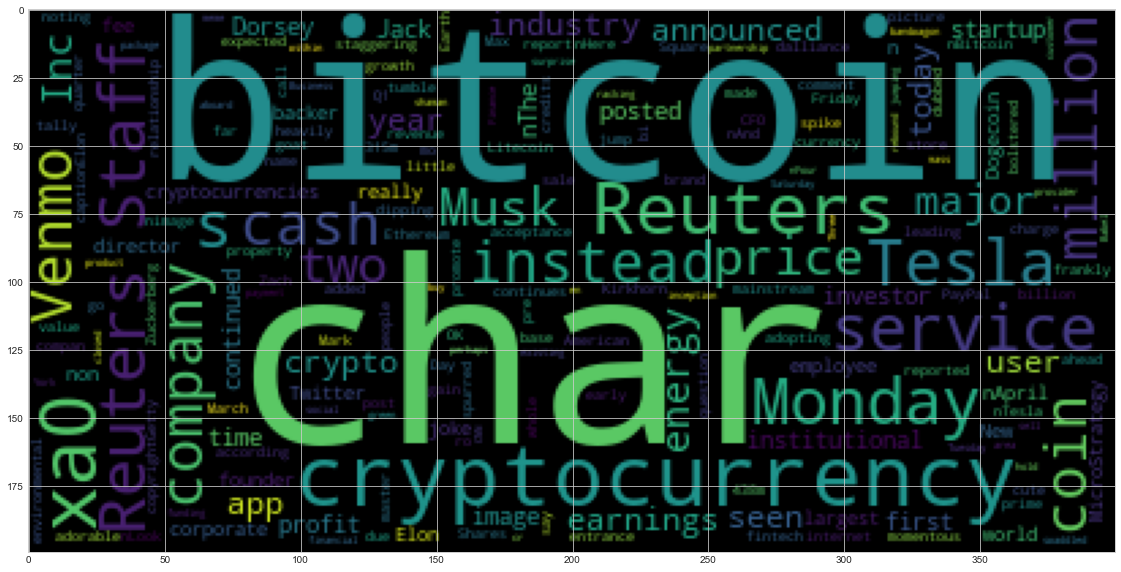

In [113]:
# Generate the Bitcoin word cloud
bit_string = ' '.join(bit_tokens)
#bit_string
wc_btc = WordCloud().generate(bit_string)
plt.imshow(wc_btc)

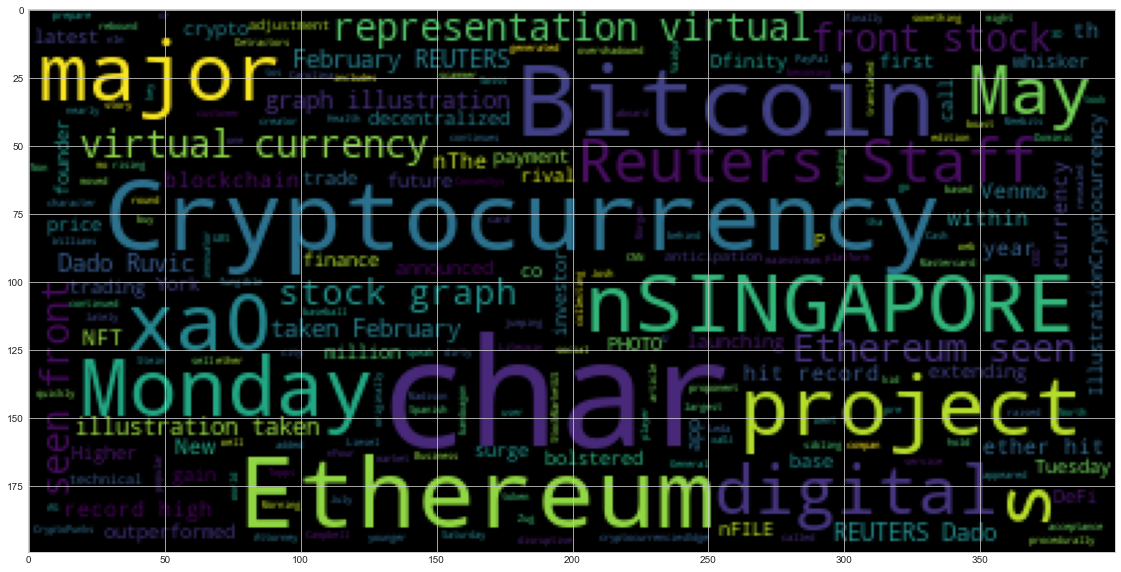

In [124]:
# Generate the Ethereum word cloud
eth_string = ' '.join(eth_tokens)
wc_eth = WordCloud().generate(eth_string)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [128]:
import spacy
from spacy import displacy

In [129]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [130]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [126]:
# Concatenate all of the Bitcoin text together
bit_string

"'Shares Square 6 today American fintech company reported staggering 5.06 billion revenue Q1 2021 earnings report far ahead expected tally 3.36 bi… +2045 char 'Tesla ’ relationship bitcoin dalliance according comment made company ’ CFO dubbed “ master coin ” Zach Kirkhorn earnings call Monday Instead compan… +3073 char 'Cryptocurrency continues gain mainstream acceptance PayPal announced added Bitcoin Ethereum Bitcoin Cash Litecoin Venmo app user base 70 million mo… +2782 char 'The crypto industry whole seen momentous year growth heavily spurred entrance institutional investor adopting bitcoin due store value property 2020 spike… +4675 char 'Cryptocurrency price continued tumble Friday Bitcoin leading charge price internet currency dipping 50,000 first time since early March.\\r\\nBitcoin ro… +1222 char Mark Zuckerberg posted picture two frankly adorable goat noting name Max Bitcoin.\\r\\nAnd say OK then.\\xa0\\r\\nHere 's post question.\\xa0\\r\\nLook cute little go… +1482 char image 

In [131]:
# Run the NER processor on all of the text
bit_doc = nlp(bit_string)

# Add a title to the document
bit_doc.user_data['title'] = 'Bitcoin NER'

In [132]:
# Render the visualization
displacy.render(bit_doc, style='ent', jupyter=True)

In [134]:
# List all Entities
for ent in bit_doc.ents:
    print(ent.text, ent.label_)

6 CARDINAL
today DATE
American NORP
5.06 billion CARDINAL
2021 DATE
3.36 CARDINAL
Zach Kirkhorn PERSON
Monday DATE
PayPal PERSON
Bitcoin Ethereum Bitcoin Cash Litecoin ORG
70 million CARDINAL
2020 DATE
Friday DATE
Bitcoin PERSON
50,000 CARDINAL
first ORDINAL
Mark Zuckerberg PERSON
two CARDINAL
Max PERSON
Musk PERSON
first quarter DATE
438 CARDINAL
315 MONEY
Bitcoin PERSON
Earth LOC
Jack Dorsey PERSON
Three year DATE
Babel Finance ORG
Monday DATE
Venmo PERSON
Tuesday DATE
Venmo PERSON
New York GPE
CNN ORG
Saturday DATE
6 CARDINAL
Reuters ORG
Reuters ORG
Inc ORG
Monday DATE
two CARDINAL
two CARDINAL
today DATE
Elon Musk PERSON
Twitter PRODUCT
Dogecoin DOGE PERSON
one CARDINAL
Reuters ORG
Staff\r\nApril 12 DATE
Reuters ORG
Monday DATE
Jack Dorsey PERSON
Twitter PERSON
Wednesday DATE
Elon Musk PERSON
BBC ORG
Coinswitch Kuber PERSON
India GPE
Thursday DATE
25 million CARDINAL
Indi PERSON
Reuters ORG
Staff\r\nApril 18 DATE
Reuters ORG
7.7 CARDINAL
Sunday DATE
4,624.21 CARDINAL
Reuters ORG
Sa

---

### Ethereum NER

In [135]:
# Concatenate all of the Ethereum text together
eth_string

"'Their investor call disruptive innovator Detractors like North Carolina Attorney General Josh Stein call dirty scammer Leda Health co-founders Madison Campbell Liesel Vaidya th… +8679 char 'Cryptocurrency continues gain mainstream acceptance PayPal announced added Bitcoin Ethereum Bitcoin Cash Litecoin Venmo app user base 70 million mo… +2782 char 'Venmo jumping aboard cryptocurrency bandwagon.\\xa0\\r\\nThe social payment service announced Tuesday customer buy hold sell cryptocurrencies within Venmo app.\\xa0\\r\\nFour cr… +1524 char New York CNN Business Bitcoin price continued rebound Saturday rising 6 nearly 58,000 world 's largest cryptocurrency overshadowed lately younger sibling … +866 char 'The creator behind CryptoPunks one popular NFT project web revealed latest project called Meebits project boast 20,000 procedurally generated 3D character tha… +2000 char 'ConsenSys key player crypto major proponent Ethereum blockchain raised a\\xa0 65 million funding round from\\xa0J.P Mo

In [136]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_string)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER'

In [137]:
# Render the visualization
displacy.render(eth_doc, style='ent', jupyter=True)

In [138]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

North Carolina GPE
Josh Stein PERSON
Leda Health ORG
Madison Campbell Liesel Vaidya PERSON
PayPal PERSON
Bitcoin Ethereum Bitcoin Cash Litecoin ORG
70 million CARDINAL
Venmo PERSON
Tuesday DATE
Venmo PERSON
New York GPE
CNN ORG
Saturday DATE
6 CARDINAL
CryptoPunks PRODUCT
one CARDINAL
NFT ORG
Meebits NORP
20,000 CARDINAL
ConsenSys ORG
Ethereum ORG
65 million CARDINAL
Morgan Mastercard UBS AG ORG
Reuters ORG
Ethereum ORG
February 19 2021 DATE
Ethereum ORG
February 19 2021 DATE
Dfinity GPE
July 2018 DATE
Swiss NORP
Zug PERSON
Dominic Williams PERSON
Dfinity ORG
StockMarketUS Stock Futures Edge ORG
Monday DATE
U.S. GPE
Monday DATE
Topps GPE
first ORDINAL
NFT ORG
Spanish NORP
AI ORG
today DATE
Vitalik Buterin PERSON
27-year-old DATE
Ethereum ORG
February 19 2021 DATE
Reuters ORG
Reuters ORG
Monday DATE
3,000 CARDINAL
last week DATE
Europe LOC
Sotheby\ ORG
Tuesday DATE
Love Air WORK_OF_ART
first ORDINAL
NEW YORK GPE
May 7 DATE
Reuters Ethereum ORG
DeFi NORP
Reuters ORG
Ethereum ORG
February

---